In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re 
from wordcloud import WordCloud

In [2]:
from google.colab import files
files.upload()

Saving Real_News.xlsx to Real_News.xlsx
Saving Fake_News.xlsx to Fake_News.xlsx


In [3]:
df=pd.read_excel('Real_News.xlsx')
fake_df=pd.read_excel('Fake_News.xlsx')

In [4]:
df['labels']=0
fake_df['labels']=1

In [5]:
print(df.shape)
print(fake_df.shape)

(21755, 4)
(23697, 4)


In [6]:
df['News_text'][1716]

'NEW DELHI (Reuters) - India stood ready to further strengthen ties with the United States, the government said on Friday, after U.S. Secretary of State Tillerson vowed to dramatically expand cooperation as a way to counter China s influence in Asia.  Tillerson, who is visiting India next week as part of a tour to the region, said in a speech the United States had begun to discuss alternatives to Chinese infrastructure financing in Asia that critics say has spawned resentment and fears of a debt trap. He also called for expanding the scope of security cooperation between India, the United States and Japan to include other countries such as Australia, a plan that China has said in the past would be de-stabilising to the region. An Indian foreign ministry spokesman said Tillerson had made an important speech on the future of India-U.S. relations and India looked forward to detailed discussions next week.  We appreciate his positive evaluation of the relationship and share his optimism ab

In [7]:
df=df.append(fake_df,ignore_index=True)

In [8]:
df.tail(5)

,Title,News_text,Subject,labels
45447,CLOAKED ORDER: Whoâ€™s Really Behind â€˜New Au...,"21st Century Wire says Earlier this week, the ...",Middle-east,1
45448,Bill Maher Gets His Swagger On Over Liberal C...,Bill Maher finished Friday s episode of Real T...,News,1
45449,WHOA! BLACK WOMAN FED UP WITH BLACK RACISTS NA...,WOW This woman absolutely nails it!,politics,1
45450,"State Dept. Releases 7,000 Clinton E-mails But...","The State Department released 7,000 Clinton e-...",politics,1
45451,"Muslim Afghani Rapes 2-YEAR-OLD, Gets 2 Years ...",A 22-year-old Muslim man from Afghanistan prou...,PoliticalFact,1


In [9]:
df['text']=df['Title']+df['News_text']

In [10]:
df=df.drop(labels=['Title','News_text'],axis=1)
df.head()

,Subject,labels,text
0,politicsNews,0,Trump judicial nominee withdraws from consider...
1,politicsNews,0,No. 2 Democrat in Senate calls on Franken to r...
2,politicsNews,0,"WTO chief won't debate Trump, but rallies supp..."
3,worldnews,0,Hungary says it is facing 'frontal assault' fr...
4,politicsNews,0,Senate Republicans shove tax bill ahead as Dem...


In [11]:
df.shape

(45452, 3)

In [ ]:
df=df.drop_duplicates()

In [12]:
df.shape

(45452, 3)

In [13]:
df.isna().any()

Subject    False
labels     False
text       False
dtype: bool

In [14]:
def cleaning(Inpdata):
    cleanedArticle1=re.sub(r'(Reuters)-[?|$|(),"".@#=><|!]Â&*/',r' ',Inpdata)
    cleanedArticle2=re.sub(r'https?://\S+|www\.\S+',r' ',cleanedArticle1)
    cleanedArticle3=re.sub(r'\b\w{1,2}\b',r' ',cleanedArticle2)
    cleanedArticle4=re.sub(r'[^a-z A-Z]',r' ',cleanedArticle3)
    cleanedArticle5=cleanedArticle4.lower()
    cleanedArticle6=re.sub(r' +',r' ',cleanedArticle5)
    return(cleanedArticle6)

In [15]:
df['txt_new']=df['text'].apply(cleaning)

In [18]:
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [19]:
df['txt_new']=df['txt_new'].str.strip()

In [21]:
df['txt_new'][1716]

'india says ready for stronger ties after tillerson endorsementnew delhi reuters india stood ready further strengthen ties with the united states the government said friday after secretary state tillerson vowed dramatically expand cooperation way counter china influence asia tillerson who visiting india next week part tour the region said speech the united states had begun discuss alternatives chinese infrastructure financing asia that critics say has spawned resentment and fears debt trap also called for expanding the scope security cooperation between india the united states and japan include other countries such australia plan that china has said the past would stabilising the region indian foreign ministry spokesman said tillerson had made important speech the future india relations and india looked forward detailed discussions next week appreciate his positive evaluation the relationship and share his optimism about its future directions the spokesman said tillerson did not say wh

In [23]:
import nltk
from nltk.corpus import stopwords
from stop_words import get_stop_words
nltk.download('stopwords')
stopwords = stopwords.words('english')
en_stop = get_stop_words('en')
ps=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def word_lema(inpdata):
    corp_text=''
    for w in inpdata.split():
        if w not in en_stop:
             corp_text=''.join(ps.lemmatize(w))
             return(corp_text)

In [ ]:
for i in range(len(df)):
   df['lema_text']=word_lema(df['txt_new'][i])

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8,max_features=1250,stop_words=en_stop)
X=vectorizer.fit_transform(df['txt_new'])

In [26]:
X.shape

(45452, 1250)

In [27]:
train_df=pd.DataFrame(data=X.toarray(),columns=vectorizer.get_feature_names())
train_df['labels']=df['labels']

In [28]:
train_df

,abc,ability,able,abortion,absolutely,access,according,account,accused,across,act,action,actions,activists,actually,added,adding,additional,address,administration,adviser,affairs,afghanistan,african,agencies,agency,agenda,agents,ago,agree,agreed,agreement,ahead,aid,air,allegations,alleged,allies,allow,allowed,...,went,west,western,whether,white,whole,whose,wife,will,willing,win,wing,winning,wire,within,without,woman,women,won,word,words,work,worked,workers,working,world,worse,worst,worth,wouldn,wrong,wrote,year,years,yemen,yes,yet,york,young,labels
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.061092,0.000000,0.000000,0.000000,0.053329,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.062605,0.0,0.0,0.0,0.139251,0.0,0.069706,0.078423,0.032796,0.0,0.064965,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.082084,0.0,0.0,0.000000,0.067683,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.169893,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.162683,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.061892,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.063172,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.050965,0.0,0.0,0.0,0.000000,0.0,0.000000,0.044496,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.069690,0.078039,0.0,0.0,0.000000,0.0,0.000000,0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.164330,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.176292,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.026578,0.000000,0.061173,0.035035,0.032015,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.027537,0.0,0.000000,0.0,0.029761,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.038695,0.0,0.000000,0.000000,0.013670,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.031594,0.0,0.026192,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.017220,0.038566,0.0,0.0,0.025464,0.0,0.030489,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45447,0.0,0.040356,0.0,0.0,0.000000,0.0,0.023636,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.207078,0.0,0.0,0.092462,0.0,0.0,0.125723,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.200033,0.0,0.083883,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.025606,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.040105,0.044909,0.0,0.0

In [29]:
selected_feat=vectorizer.get_feature_names()

In [30]:
train_df['labels'].unique()

array([0, 1])

In [31]:
X=train_df[selected_feat].values
y=train_df['labels'].values

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc
from sklearn.naive_bayes import GaussianNB 
import lightgbm as lgb
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import plot_confusion_matrix


In [ ]:
#### XGBCLassifier########

In [36]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #nb1=CatBoostClassifier(verbose=False,iterations=285,learning_rate=0.0915,depth=3,l2_leaf_reg=5.0,bootstrap_type='Bayesian',bagging_temperature=0.5,sampling_frequency='PerTreeLevel',grow_policy='Depthwise',leaf_estimation_method='Newton',model_shrink_mode='Constant',class_weights=[3,9])
    
    nb2=XGBClassifier(max_depth=7, learning_rate=0.09675, n_estimators=18,objective='binary:logistic', booster='gbtree',gamma=0.95,subsample=0.40,colsample_bytree=0.75,colsample_bylevel=0.65)

    #nb3=lgb.LGBMClassifier(objective='binary',boosting='gbdt',learning_rate =0.0975, max_depth =-1,num_leaves =225,n_estimators = 14500,bagging_fraction = 0.8,feature_fraction = 0.7,reg_alpha = 0.5,reg_lambda = 0.4)
    
    #vr=VotingClassifier([('cat',nb1),('xgb',nb2),('lgb',nb3)],voting='hard')
    eval_set = [(X_test, y_test)]
    search=nb2.fit(X_train,y_train,eval_set=eval_set,eval_metric='auc',early_stopping_rounds=500)
    pred_test=search.predict(X_test)
    pred_train=search.predict(X_train)
    accuracy_score_train=accuracy_score(y_train,pred_train)
    print("The accuracy_score on Train",accuracy_score_train)
    accuracy_score_test=accuracy_score(y_test,pred_test)
    print("The accuracy_score on Test",accuracy_score_test)
    print("The confusion Matrix",confusion_matrix(y_test,pred_test))
    print("The auc of Train",auc(y_train,pred_train))
    print("The auc of Test",auc(y_test,pred_test))
    print('*'*50)

[0]	validation_0-auc:0.956459
Will train until validation_0-auc hasn't improved in 500 rounds.
[1]	validation_0-auc:0.995347
[2]	validation_0-auc:0.995641
[3]	validation_0-auc:0.995898
[4]	validation_0-auc:0.996027
[5]	validation_0-auc:0.996066
[6]	validation_0-auc:0.996312
[7]	validation_0-auc:0.996424
[8]	validation_0-auc:0.996411
[9]	validation_0-auc:0.996477
[10]	validation_0-auc:0.996592
[11]	validation_0-auc:0.996776
[12]	validation_0-auc:0.996845
[13]	validation_0-auc:0.996825
[14]	validation_0-auc:0.996878
[15]	validation_0-auc:0.996886
[16]	validation_0-auc:0.996901
[17]	validation_0-auc:0.996933
The accuracy_score on Train 0.9904018041307995
The accuracy_score on Test 0.987240127598724
The confusion Matrix [[4260   91]
 [  25 4715]]
The auc of Train 0.5
The auc of Test 0.5
**************************************************
[0]	validation_0-auc:0.959712
Will train until validation_0-auc hasn't improved in 500 rounds.
[1]	validation_0-auc:0.996477
[2]	validation_0-auc:0.99702
[

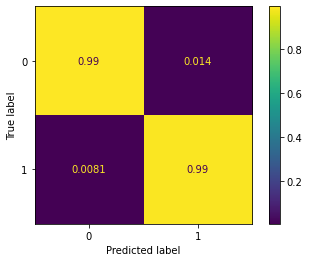

In [48]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb2, X_test, y_test,normalize='pred')  
plt.show()  

In [ ]:
#### LGBM CLASSIFIER #########

In [37]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #nb1=CatBoostClassifier(verbose=False,iterations=285,learning_rate=0.0915,depth=3,l2_leaf_reg=5.0,bootstrap_type='Bayesian',bagging_temperature=0.5,sampling_frequency='PerTreeLevel',grow_policy='Depthwise',leaf_estimation_method='Newton',model_shrink_mode='Constant',class_weights=[3,9])
    
    #nb2=XGBClassifier(max_depth=7, learning_rate=0.09675, n_estimators=18,objective='binary:logistic', booster='gbtree',gamma=0.95,subsample=0.40,colsample_bytree=0.75,colsample_bylevel=0.65)

    nb3=lgb.LGBMClassifier(objective='binary',boosting='gbdt',learning_rate =0.0975, max_depth =-1,num_leaves =225,n_estimators = 14500,bagging_fraction = 0.8,feature_fraction = 0.7,reg_alpha = 0.5,reg_lambda = 0.4)
    
    #vr=VotingClassifier([('cat',nb1),('xgb',nb2),('lgb',nb3)],voting='hard')
    eval_set = [(X_test, y_test)]
    search=nb3.fit(X_train,y_train,eval_set=eval_set,eval_metric='auc',early_stopping_rounds=500)
    pred_test=search.predict(X_test)
    pred_train=search.predict(X_train)
    accuracy_score_train=accuracy_score(y_train,pred_train)
    print("The accuracy_score on Train",accuracy_score_train)
    accuracy_score_test=accuracy_score(y_test,pred_test)
    print("The accuracy_score on Test",accuracy_score_test)
    print("The confusion Matrix",confusion_matrix(y_test,pred_test))
    print("The auc of Train",auc(y_train,pred_train))
    print("The auc of Test",auc(y_test,pred_test))
    print('*'*50)

[1]	valid_0's binary_logloss: 0.603498	valid_0's auc: 0.995301
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's binary_logloss: 0.530713	valid_0's auc: 0.996794
[3]	valid_0's binary_logloss: 0.479267	valid_0's auc: 0.99787
[4]	valid_0's binary_logloss: 0.435497	valid_0's auc: 0.997653
[5]	valid_0's binary_logloss: 0.397408	valid_0's auc: 0.997726
[6]	valid_0's binary_logloss: 0.364961	valid_0's auc: 0.997667
[7]	valid_0's binary_logloss: 0.327763	valid_0's auc: 0.997812
[8]	valid_0's binary_logloss: 0.301082	valid_0's auc: 0.997935
[9]	valid_0's binary_logloss: 0.271912	valid_0's auc: 0.997997
[10]	valid_0's binary_logloss: 0.246474	valid_0's auc: 0.997998
[11]	valid_0's binary_logloss: 0.223989	valid_0's auc: 0.998197
[12]	valid_0's binary_logloss: 0.20395	valid_0's auc: 0.998239
[13]	valid_0's binary_logloss: 0.186274	valid_0's auc: 0.998257
[14]	valid_0's binary_logloss: 0.170577	valid_0's auc: 0.998265
[15]	valid_0's binary_logloss: 0.156755	valid_0's au

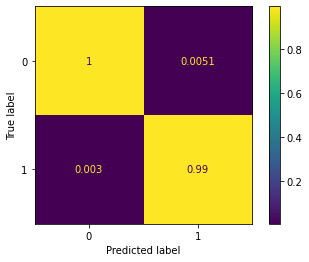

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb3, X_test, y_test,normalize='pred')  
plt.show()  

In [ ]:
#### CatBoost CLASSIFIER #########

In [39]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    nb1=CatBoostClassifier(verbose=False,iterations=285,learning_rate=0.0915,depth=3,l2_leaf_reg=5.0,bootstrap_type='Bayesian',bagging_temperature=0.5,sampling_frequency='PerTreeLevel',grow_policy='Depthwise',leaf_estimation_method='Newton',model_shrink_mode='Constant',class_weights=[3,9])
    
    #nb2=XGBClassifier(max_depth=7, learning_rate=0.09675, n_estimators=18,objective='binary:logistic', booster='gbtree',gamma=0.95,subsample=0.40,colsample_bytree=0.75,colsample_bylevel=0.65)

    #nb3=lgb.LGBMClassifier(objective='binary',boosting='gbdt',learning_rate =0.0975, max_depth =-1,num_leaves =225,n_estimators = 14500,bagging_fraction = 0.8,feature_fraction = 0.7,reg_alpha = 0.5,reg_lambda = 0.4)
    
    #vr=VotingClassifier([('cat',nb1),('xgb',nb2),('lgb',nb3)],voting='hard')
    eval_set = [(X_test, y_test)]
    search=nb1.fit(X_train,y_train,eval_set=eval_set,early_stopping_rounds=1500)
    pred_test=search.predict(X_test)
    pred_train=search.predict(X_train)
    accuracy_score_train=accuracy_score(y_train,pred_train)
    print("The accuracy_score on Train",accuracy_score_train)
    accuracy_score_test=accuracy_score(y_test,pred_test)
    print("The accuracy_score on Test",accuracy_score_test)
    print("The confusion Matrix",confusion_matrix(y_test,pred_test))
    print("The auc of Train",auc(y_train,pred_train))
    print("The auc of Test",auc(y_test,pred_test))
    print('*'*50)

The accuracy_score on Train 0.9896042463078574
The accuracy_score on Test 0.988560114398856
The confusion Matrix [[4266   85]
 [  19 4721]]
The auc of Train 0.5
The auc of Test 0.5
**************************************************
The accuracy_score on Train 0.989934270234592
The accuracy_score on Test 0.988890111098889
The confusion Matrix [[4274   77]
 [  24 4716]]
The auc of Train 0.5
The auc of Test 0.5
**************************************************
The accuracy_score on Train 0.9902645619052858
The accuracy_score on Test 0.9877887788778877
The confusion Matrix [[4259   92]
 [  19 4720]]
The auc of Train 0.5
The auc of Test 0.0
**************************************************
The accuracy_score on Train 0.9894395247786151
The accuracy_score on Test 0.988998899889989
The confusion Matrix [[4277   74]
 [  26 4713]]
The auc of Train 0.5
The auc of Test 0.5
**************************************************
The accuracy_score on Train 0.9895220284912821
The accuracy_score on Tes

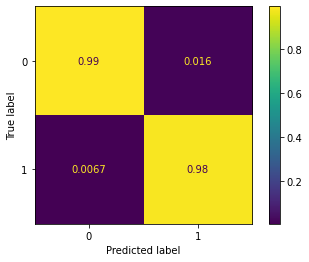

In [46]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb1, X_test, y_test,normalize='pred')  
plt.show()  

In [49]:
import pickle
dbfile = open('examplePickle.pkl', 'ab')
pickle.dump(nb1, dbfile)                     
dbfile.close()